# Logistic Regression and Gradient Descent
Implementation of Logistic Regression using NumPy. And classification of IRIS data set using One vs All approach.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Task 1
- Implement the fixed learning rate stochastic gradient descent algorithm.

In [4]:
# Calculate the error
def calculate_error(X, W, Y):
    error = 0
    for i, x in enumerate(X):
        error = np.log(1 + np.exp(-Y[i]*np.dot(2*W, X[i])))
    return error/len(X)

# Logistic Regression
def log_regression(X_in, Y_in, X_out, Y_out, T=2000, learning_rate=0.001):
    W = np.zeros((X_in.shape[1],)) 
    errors_in = []
    errors_out = []
    
    for i in range(T):
        n = np.random.randint(0,len(X_in))
        x_n = X_in[n]
        E_dev = (-Y_in[n] * x_n)/(1 + np.exp((Y_in[n] * np.dot(W, x_n))))
        W = W - learning_rate * E_dev
        # Calculate insample error
        errors_in.append(calculate_error(X_in, W, Y_in))
        # Calculate out of sample error
        errors_out.append(calculate_error(X_out, W, Y_out))
    return W, errors_in, errors_out

## Task 2
- Prepare the data

### IRIS Data Set
- Load IRIS data set of size 150
- Split the data into training (80% = 120 examples) and test data (20% = 30 examples) sets

In [61]:
# Load the iris data
iris = load_iris()
X_data = iris.data
Y_data = iris.target

# Shuffle the data
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X_data))
X_data, Y_data = X_data[permutation], Y_data[permutation]

# Split the data to train and test
X_train, X_test, Y_train, Y_test = X_data[:120], X_data[120:], Y_data[:120], Y_data[120:]

### One vs All
- Generate Dk for each class where Dk = {(xn, y'n = 2[yn = k]-1)} for n in N

In [6]:
# Generate labels for OVA decomposition
def generate_D_Y(Y, k):
    Y_copy = np.copy(Y)
    for i, y in enumerate(Y_copy):
        Y_copy[i] = 2 * (int(y) == k) - 1
    return Y_copy

In [62]:
D0_Y_train = generate_D_Y(Y_train, 0)
D1_Y_train = generate_D_Y(Y_train, 1)
D2_Y_train = generate_D_Y(Y_train, 2)

D0_Y_test = generate_D_Y(Y_test, 0)
D1_Y_test = generate_D_Y(Y_test, 1)
D2_Y_test = generate_D_Y(Y_test, 2)

## Task 3
- Plot E_in() and E_out() as a function of t, and briefly state your findings.

Calculate the errors and weights generated by running the 'log_regression()' function on each class data set

In [63]:
W0, errors_in0, errors_out0 = log_regression(X_train, D0_Y_train, X_test, D0_Y_test)
W1, errors_in1, errors_out1 = log_regression(X_train, D1_Y_train, X_test, D1_Y_test)
W2, errors_in2, errors_out2 = log_regression(X_train, D2_Y_train, X_test, D2_Y_test)

### Errors graphs of each class Dk

In [69]:
# Plot the errors
def plot_errors(errors_in, errors_out):
    plt.rcParams["figure.figsize"] = (12,9)

    # Plot the target function
    plt.plot(range(2000), errors_in, 'g', label = 'in sample errors')
    plt.plot(range(2000), errors_out, 'r', label = 'out of sample errors')

    plt.xlabel('iterations')
    plt.ylabel('errors')
    plt.legend()
    plt.show()

### Class 0 (D0)
- E_in and E_out as a function of t, while training on the D0

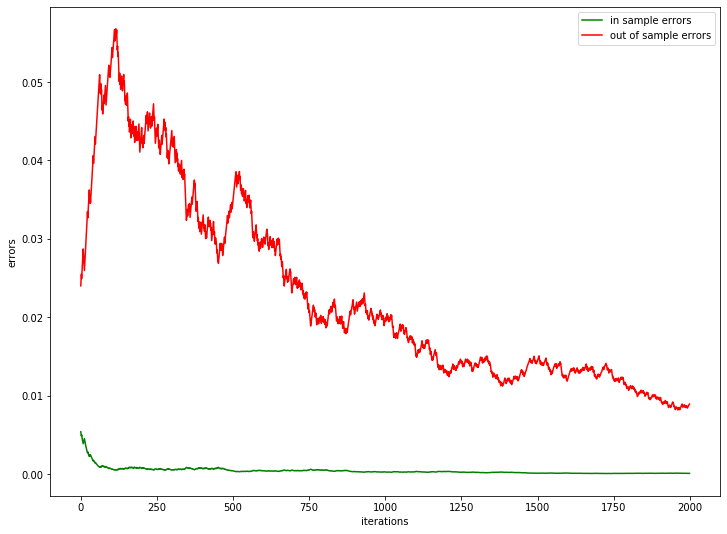

In [70]:
# Plot the error function for D0
plot_errors(errors_in0, errors_out0)

### Class 1 (D1)
- E_in and E_out as a function of t, while training on the D1

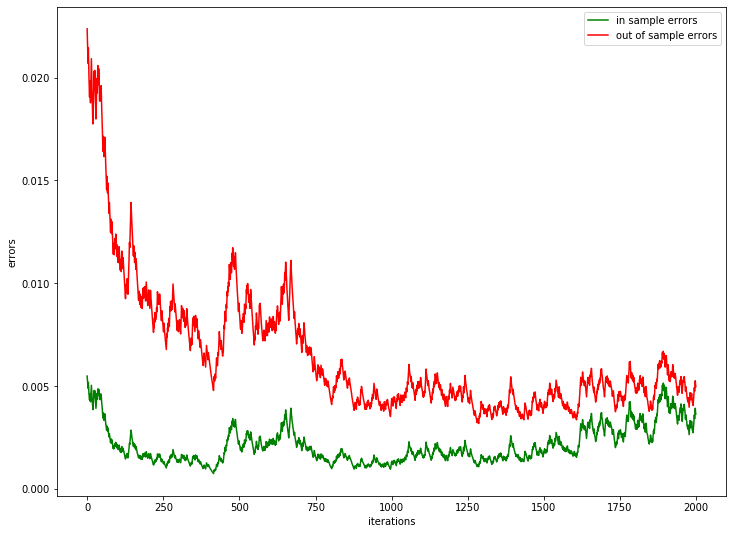

In [71]:
# Plot the error function for D1
plot_errors(errors_in1, errors_out1)

### Class 2 (D2)
- E_in and E_out as a function of t, while training on the D2

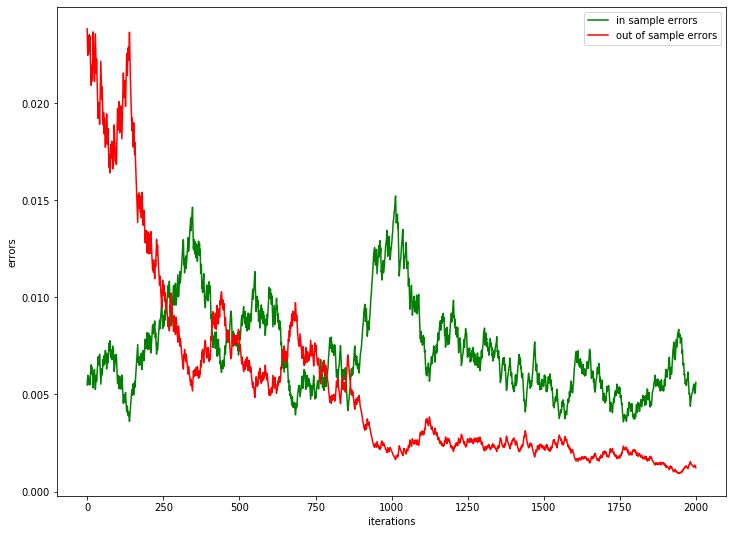

In [72]:
# Plot the error function for D2
plot_errors(errors_in2, errors_out2)

### Accuracy of the Model
- Claculate the Y_pred using g(x) = argmax(sigmoid(dot(Wk.T,x)))
- Calculate the accuracy of the model on the original test data set by comparison of Y_pred and actual labels

In [58]:
# Calculate the probability that x belongs to the class
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Choose the class with the most probability 
def predict(p):
    Y_pred = []
    for i in range(len(p[0])):
        Y_pred.append(np.argmax(p[:,i]))
    return Y_pred

# Calculate the accuracy of Y_pred
def calculate_accuracy(Y_pred, Y):
    correct = 0
    for i in range(len(Y)):
        if Y_pred[i] == Y[i]:
            correct += 1
    return correct/len(Y)

In [67]:
prob0 = sigmoid(np.dot(X_test, W0))
prob1 = sigmoid(np.dot(X_test, W1))
prob2 = sigmoid(np.dot(X_test, W2))
probs = np.array([prob0, prob1, prob2])

Y_pred = predict(probs)
print('accuracy of the model:', calculate_accuracy(Y_pred, Y_test))

accuracy of the model: 0.7


In [68]:
print('predictions:', np.array(Y_pred))
print('labels:     ', Y_test)

predictions: [0 2 0 0 2 0 2 2 2 1 2 2 2 2 0 1 2 2 0 2 2 2 2 0 0 0 2 2 2 0]
labels:      [0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


### Summary
The error graphs show that the error is fluctuating a lot but generally decreases as t increases. That means that the weights are updated correctly. The accuracy of the model is 0.7. It can be seen that class 1 is highly misclassified in class 2. That means that the model calculates the probability that the actual example from class 1 belongs to class 1 is less than it belongs to class 2. The reason for this might be that these two classes have similar features and that the number of examples is very limited.